In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('Time spent on App and earning.csv')

In [35]:
df.head()

,Time on App,Yearly Amount Spent
0,12.655651,587.951054
1,11.109461,392.204933
2,11.330278,487.547505
3,13.717514,581.852344
4,12.795189,599.406092


In [34]:
df['Time on App'][0]

12.655651150000001

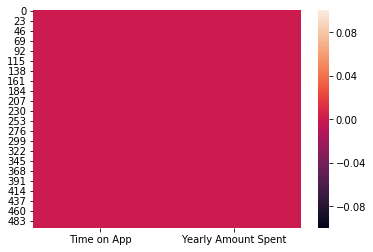

In [23]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,Time on App,Yearly Amount Spent
count,500.000000,500.000000
mean,12.052488,499.314038
std,0.994216,79.314782
min,8.508152,256.670582
25%,11.388153,445.038277
50%,11.983231,498.887875
75%,12.753850,549.313828
max,15.126994,765.518462


,Time on App,Yearly Amount Spent
Time on App,1.000000,0.499328
Yearly Amount Spent,0.499328,1.000000


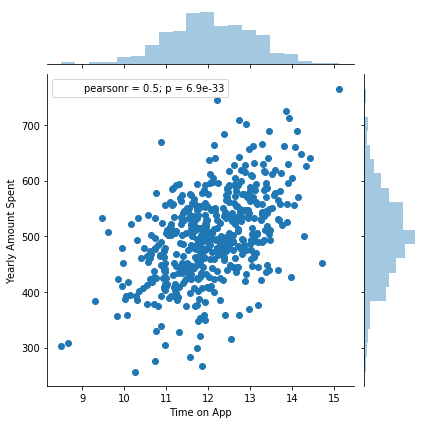

In [22]:
sns.jointplot(df['Time on App'], df['Yearly Amount Spent'])
df.corr()

In [37]:
# minimize the parameters 

def minimize_m_b1(data, m, b1, learning_rate):
    minimize_m = m
    minimize_b1 = b1
    N = float(len(data))
    for i in range(0, len(data)):
        x = data['Time on App'][i]
        y = data['Yearly Amount Spent'][i]
        minimize_m += (1/N)*( (m + b1 * x) - y)
        minimize_b1 += (1/N)*( (m + b1 * x) - y) * x
    minimized_m = m - (learning_rate * minimize_m)
    minimized_b1 = b1 - (learning_rate * minimize_b1)
    return [minimized_m, minimized_b1]
    

In [38]:

def run_minimize_m_b1(data,init_m, init_b1, learning_rate, num_iteration):
    m = init_m
    b1 = init_b1
    for i in range(num_iteration):
        m,b1 = minimize_m_b1(data, m, b1, learning_rate)
    return [m, b1]
    

In [44]:
def error_calculation(m, b1, data):
    init_error = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data['Time on App'][i]
        y = data['Yearly Amount Spent'][i]
        init_error +=((m+ b1*x)-y)**2
    total_error = (1/(2*N) * init_error)
    return (total_error)

In [151]:
def Run():
    data = pd.read_csv('Time spent on App and earning.csv')
    init_m = 0
    init_b1 = 0
    learning_rate = 0.0001
    num_iteration = 500
    [m, b1] = run_minimize_m_b1(data, init_m, init_b1, learning_rate, num_iteration)
    error = error_calculation(init_m, init_b1, data)
    print ("intercept: ",m, "Slope: ",b1)
    print("error: ",error)


In [152]:
if __name__ == '__main__':
    Run()

intercept:  3.3707596866 Slope:  40.8369247253
error:  127796.380854


In [60]:
# Now lets try to use sklearn

In [138]:
X = df['Time on App']
y = df['Yearly Amount Spent']

In [139]:
X.shape

(500,)

In [140]:
X = X.values.reshape(-1,1)

In [141]:
X.shape

(500, 1)

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
lrm = LinearRegression()

In [146]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
pred_lrm = lrm.predict(X_test)

In [148]:
from sklearn import metrics
metrics.r2_score(y_test, pred_lrm)

0.18822882786775508

Text(0,0.5,'residual')

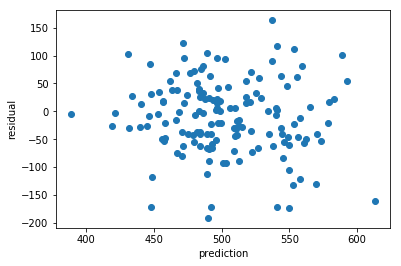

In [149]:
plt.scatter(pred_lrm,y_test-pred_lrm)
plt.xlabel('prediction')
plt.ylabel('residual')

In [150]:
lrm.coef_

array([ 41.64584878])

In [ ]:
# 1 unit increase in time spent on app will result in 41 yearly spent